# Dataset exploration

The dataset consists of historical data from 20 companies currently included in the WIG20 index on the Warsaw Stock Exchange.

Each example contains:

	•	A 60-element time series of close prices for a given hour for both the index and the instrument.
	•	The OHLC values of the instrument corresponding to that hour.
	•	30-hour and 60-hour return correlations between the index and the instrument.

The time series of the index often contain gaps and are not always complete.

Similarly, the time series of the instrument may also have missing data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import importlib
import functions.eda as eda

importlib.reload(eda)

<module 'functions.eda' from '/Users/marcel/intrahour-ts-reconstruction-1/functions/eda.py'>

In [3]:
dataset = eda.load_parquet('data/processed/processed.parquet')
eda.summarize_dataframe(dataset)

Loaded data/processed/processed.parquet. Shape: (652428, 15)

DataFrame Summary
Shape: (652428, 15)

Columns and Data Types:
timestamp       datetime64[ns]
open                   float64
high                   float64
low                    float64
close                  float64
return                 float64
series                  object
series_index            object
corr_30h               float64
corr_60h               float64
open_index             float64
high_index             float64
low_index              float64
close_index            float64
ticker                  object
dtype: object


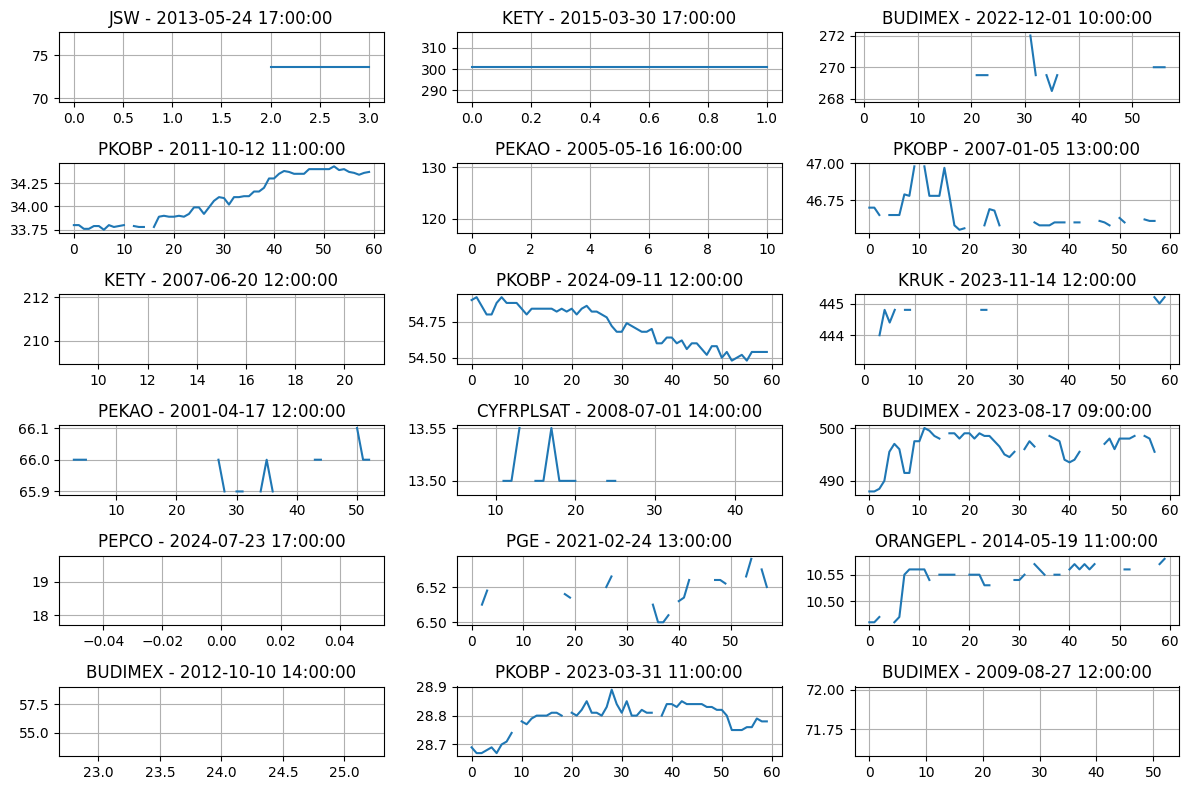

In [4]:
eda.plot_random_time_series(dataset,'series', 6,3)

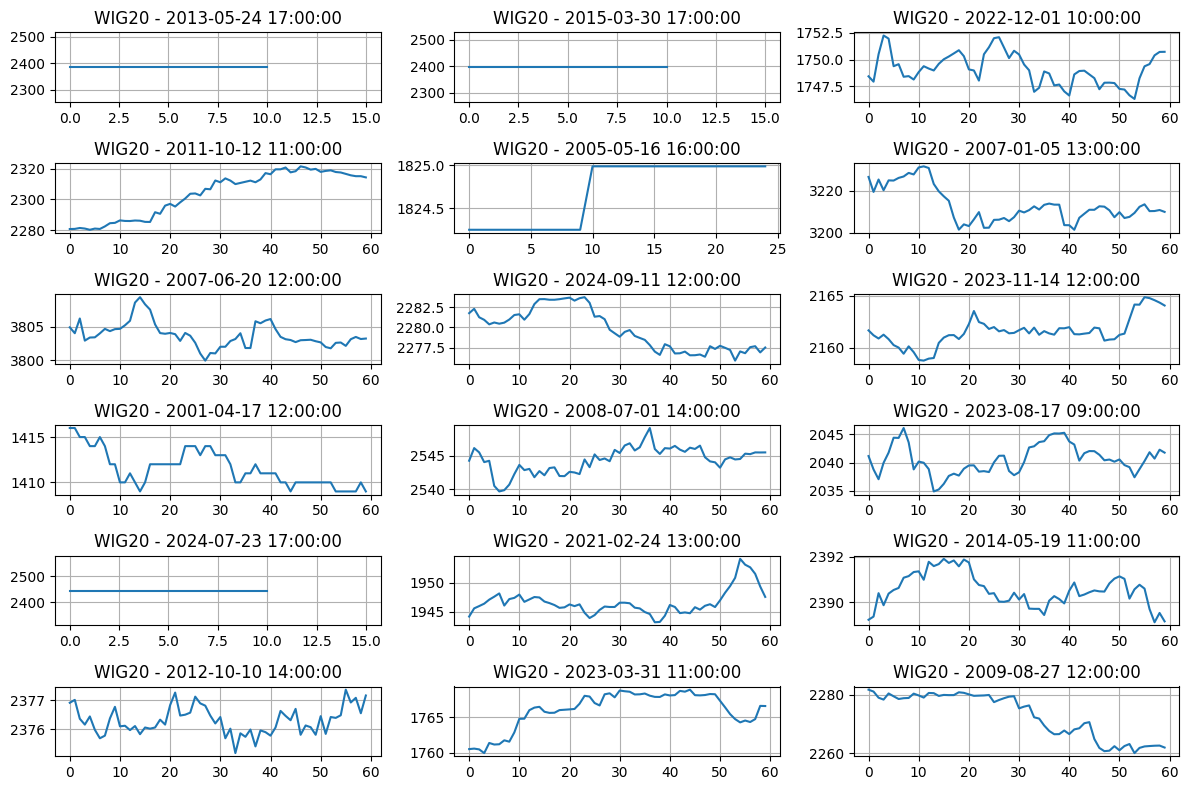

In [5]:
eda.plot_random_time_series(dataset,'series_index', 6,3)

As seen in the examples above, the index data is of much higher quality and usually does not contain gaps. Notably, the time series from 17:00 deserve attention. During this time, prices remain unchanged because the Warsaw Stock Exchange enters the auction phase, where orders can be placed but only at the closing price of the given day.

We do not worry about gaps in the data since we will apply binary masks during training.

For consistency, we can remove examples that contain empty time series as well as those with a timestamp ≥ 17:00.

In [6]:
dataset = eda.filter_by_hour(dataset, 'timestamp', 16)

Filtered DataFrame: 519379 rows remaining.


In [7]:
dataset = eda.filter_by_completeness(dataset, series_column = 'series', min_values = 10)

Filtered DataFrame: 430715 rows remaining (min 10 valid values).


In [8]:
eda.save_ml_ready(dataset, 'ml_ready.parquet', 'data/processed')

Saved ML-ready dataset to data/processed/ml_ready.parquet
